In [64]:
#Enivornment Setup

In [65]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/regression-with-neural-networking/concrete_data.csv


In [66]:
#Data Read, Data Visualization,EDA Analysis,Data Pre-Processing,Data Splitting

In [67]:
#Data Read
file_path = '../input/regression-with-neural-networking'
df=pd.read_csv(f'{file_path}/concrete_data.csv')

In [68]:
df = df.loc[:,~df.columns.duplicated()]

In [69]:
import pandas_profiling

In [70]:
# preparing profile report

profile_report = pandas_profiling.ProfileReport(df,minimal=True)
profile_report

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [72]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [73]:
df.shape

(1030, 9)

In [74]:
df.Strength.value_counts()

33.40    6
71.30    4
41.05    4
31.35    4
23.52    4
        ..
38.33    1
10.73    1
30.45    1
39.84    1
36.25    1
Name: Strength, Length: 845, dtype: int64

In [75]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [76]:
df.groupby("Age").mean()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Strength
Age,,,,,,,,
1,442.500000,0.000000,0.000000,193.000000,0.000000,1045.500000,688.000000,9.455000
3,286.581343,65.977612,57.164179,176.188806,6.616418,977.247761,796.111940,18.981194
7,312.923810,92.943651,12.642857,183.287302,3.750000,983.814286,768.103175,26.050873
14,246.182258,18.590323,97.854839,173.390323,6.679032,1023.909677,800.119355,28.750968
28,265.444471,86.285176,62.795294,183.059529,6.995765,956.059294,764.377412,36.748612
56,294.173626,55.221978,85.043956,167.448352,9.856044,979.635165,798.491209,51.890220
90,284.140741,88.524074,0.000000,200.768519,0.000000,966.137037,758.662963,40.480370
91,392.263636,148.809091,0.000000,157.763636,15.154545,918.940909,802.336364,69.808636
100,220.909615,22.165385,116.673077,169.446154,7.963462,1025.296154,809.450000,47.668846


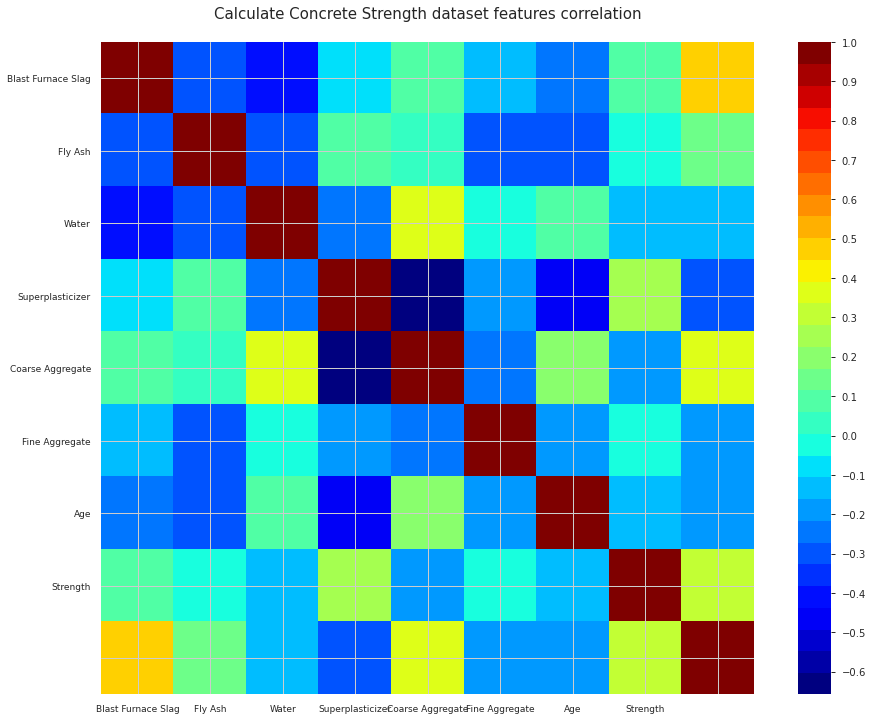

In [77]:
def correlation_matrix(d):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(figsize=(16,12))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Calculate Concrete Strength dataset features correlation\n',fontsize=15)
    labels=df.columns
    ax1.set_xticklabels(labels,fontsize=9)
    ax1.set_yticklabels(labels,fontsize=9)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0.1*i for i in range(-11,11)])
    plt.show()

correlation_matrix(df)


In [78]:
#Plotting data 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

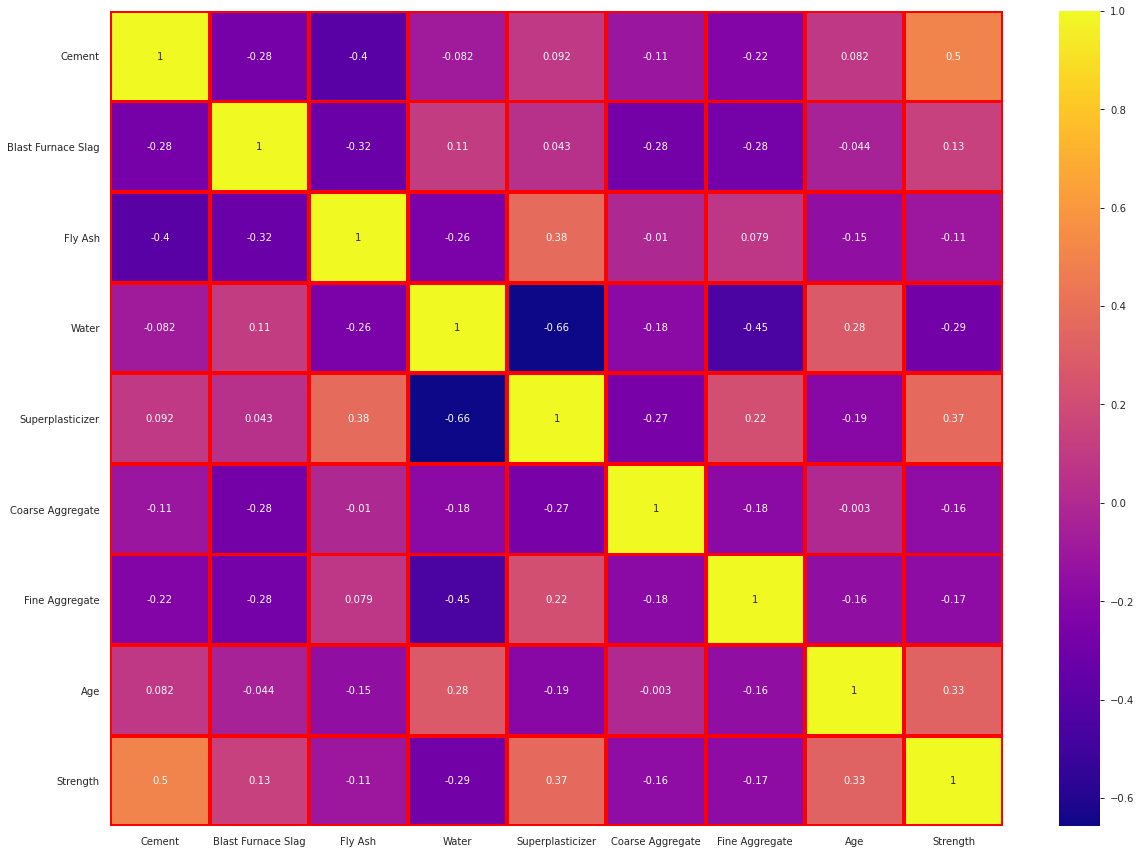

In [79]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,linecolor='red',linewidths=3,cmap = 'plasma')

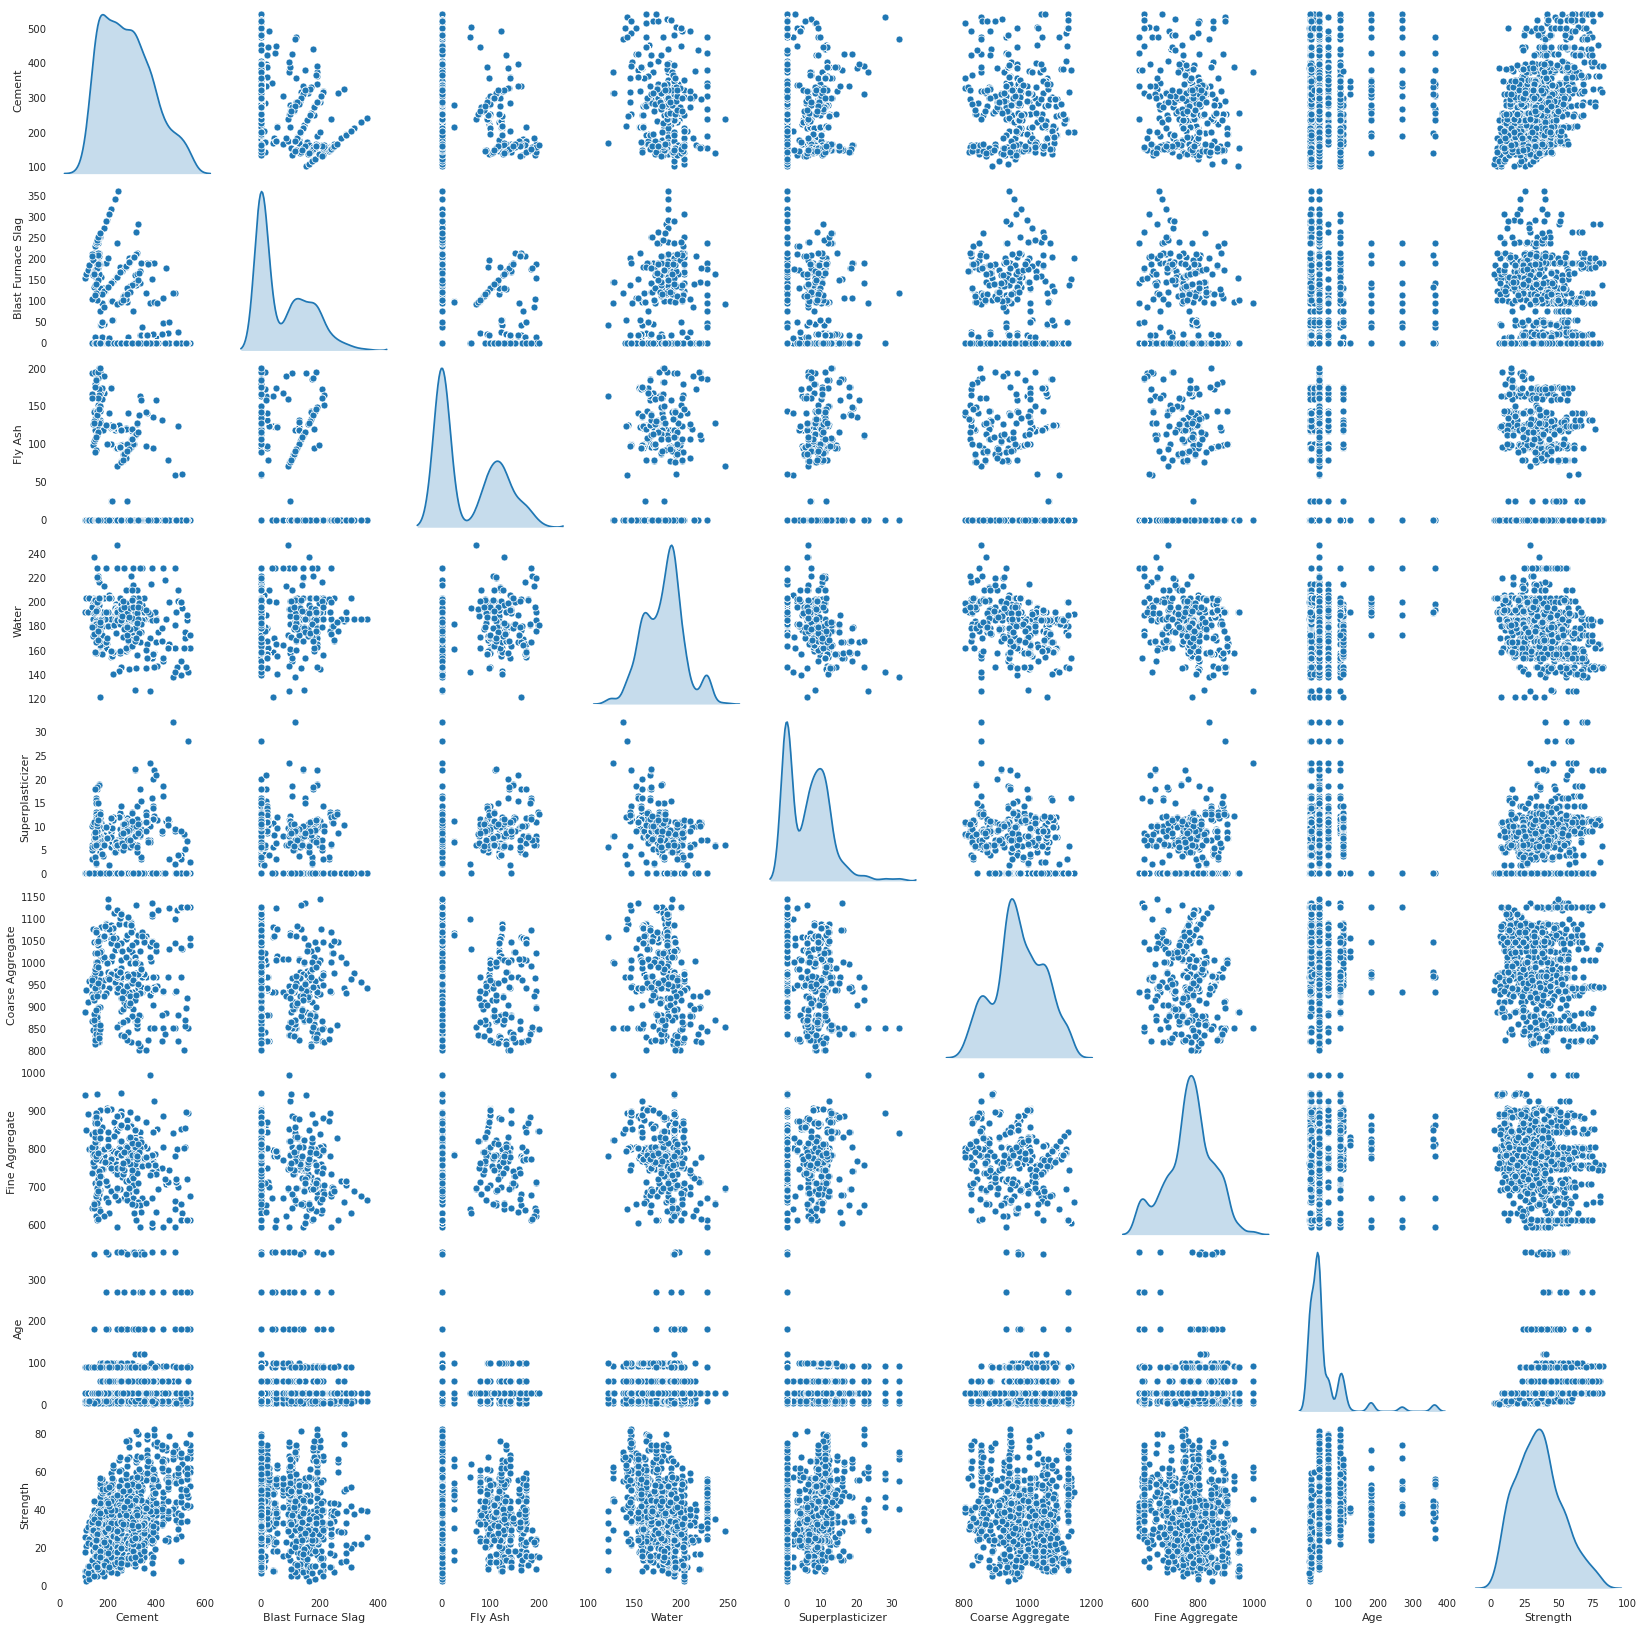

In [80]:
sns.pairplot(df,diag_kind="kde")
plt.show()

In [81]:
#Split

In [82]:
# Input/independent variables
X = df.drop('Strength', axis = 1)   # here we are droping the output feature as this is the target and 'X' is input features, the changes are not 
                                              # made inplace as we have not used 'inplace = True'
y = df['Strength'] 

In [83]:
from sklearn.model_selection import  train_test_split, cross_val_score
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape

(824, 8)

In [85]:
X_train

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
995,158.6,148.9,116.0,175.1,15.0,953.3,719.7,28
507,424.0,22.0,132.0,178.0,8.5,822.0,750.0,28
334,275.1,0.0,121.4,159.5,9.9,1053.6,777.5,3
848,252.0,97.0,76.0,194.0,8.0,835.0,821.0,28
294,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,3
...,...,...,...,...,...,...,...,...
87,286.3,200.9,0.0,144.7,11.2,1004.6,803.7,3
330,246.8,0.0,125.1,143.3,12.0,1086.8,800.9,14
466,190.3,0.0,125.2,166.6,9.9,1079.0,798.9,100
121,475.0,118.8,0.0,181.1,8.9,852.1,781.5,28


In [86]:
y_train

995    27.68
507    62.05
334    23.80
848    33.40
294     7.40
       ...  
87     24.40
330    42.22
466    33.56
121    68.30
860    38.46
Name: Strength, Length: 824, dtype: float64

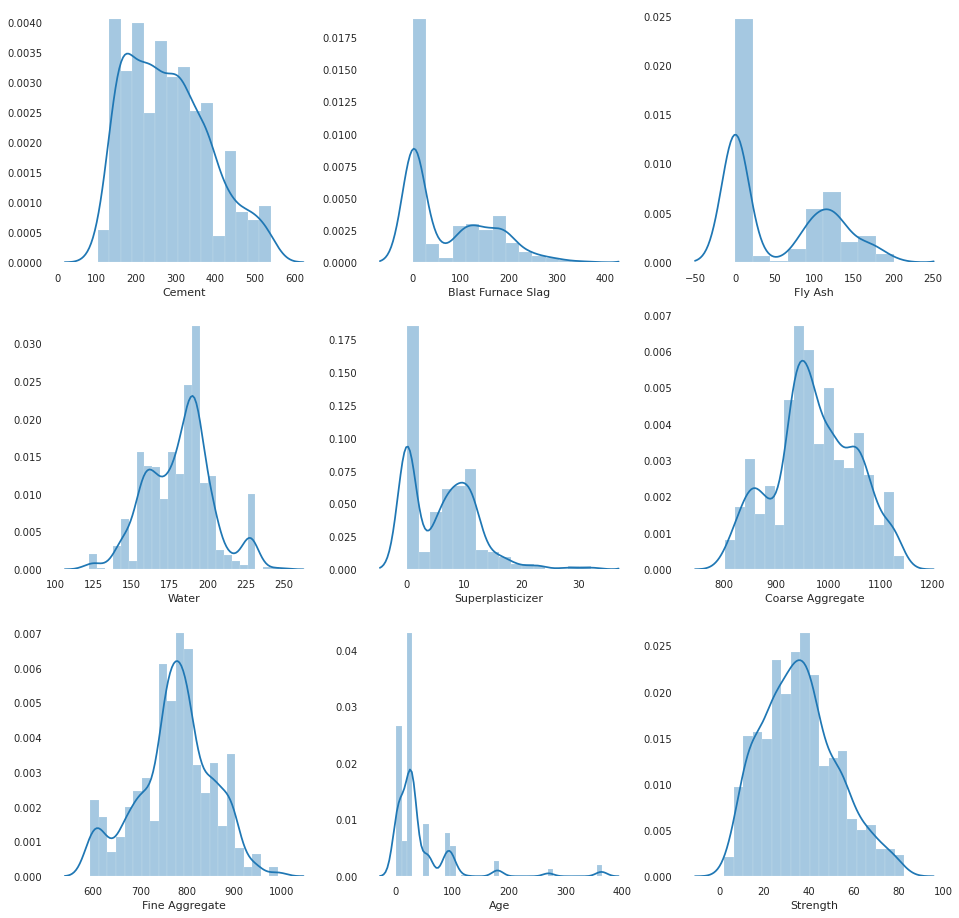

In [95]:
# Distplot
fig, ax2 = plt.subplots(3, 3, figsize=(16, 16))
sns.distplot(df['Cement'],ax=ax2[0][0])
sns.distplot(df['Blast Furnace Slag'],ax=ax2[0][1])
sns.distplot(df['Fly Ash'],ax=ax2[0][2])
sns.distplot(df['Water'],ax=ax2[1][0])
sns.distplot(df['Superplasticizer'],ax=ax2[1][1])
sns.distplot(df['Coarse Aggregate'],ax=ax2[1][2])
sns.distplot(df['Fine Aggregate'],ax=ax2[2][0])
sns.distplot(df['Age'],ax=ax2[2][1])
sns.distplot(df['Strength'],ax=ax2[2][2])

In [87]:
dims = X_train.shape[1]
print(dims, 'dims')

8 dims


In [88]:
from sklearn.preprocessing import RobustScaler, StandardScaler

In [89]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [108]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from scipy.stats import pearsonr
warnings.filterwarnings("ignore")

target = "Strength"
def model(algorithm,dtrainx,dtrainy,dtestx,dtesty,of_type,plot=False):
    
    print (algorithm)
    print ("***************************************************************************")
    algorithm.fit(dtrainx,dtrainy)
    
    #print(algorithm.get_params(deep=True))
    
    prediction = algorithm.predict(dtestx)
    
    print ("ROOT MEAN SQUARED ERROR :", np.sqrt(mean_squared_error(dtesty,prediction)) )
    print ("***************************************************************************")
    
    print ('Performance on training data :', algorithm.score(dtrainx,dtrainy)*100)
    print ('Performance on testing data :', algorithm.score(dtestx,dtesty)*100)

    print ("***************************************************************************")
    if plot==True:
        sns.jointplot(x=dtesty, y=prediction, stat_func=pearsonr,kind="reg", color="k") 
    
       
    prediction = pd.DataFrame(prediction)
    cross_val = cross_val_score(algorithm,dtrainx,dtrainy,cv=5)#,scoring="neg_mean_squared_error"
    cross_val = cross_val.ravel()
    print ("CROSS VALIDATION SCORE")
    print ("************************")
    print ("cv-mean :",cross_val.mean()*100)
    print ("cv-std  :",cross_val.std()*100)
    
    if plot==True:
        plt.figure(figsize=(20,22))
        plt.subplot(211)

        testy = dtesty.reset_index()["Strength"]

        ax = testy.plot(label="originals",figsize=(20,9),linewidth=2)
        ax = prediction[0].plot(label = "predictions",figsize=(20,9),linewidth=2)
        plt.legend(loc="best")
        plt.title("ORIGINALS VS PREDICTIONS")
        plt.xlabel("index")
        plt.ylabel("values")
        ax.set_facecolor("k")


XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=42, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)
***************************************************************************
ROOT MEAN SQUARED ERROR : 5.017479204102789
***************************************************************************
Performance on training data : 99.5854004653839
Performance on testing data : 90.22997478069891
***************************************************************************
CROSS VALID

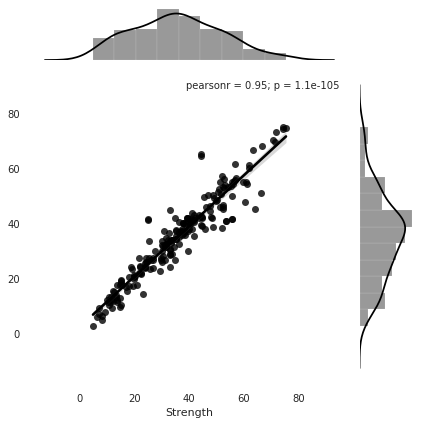

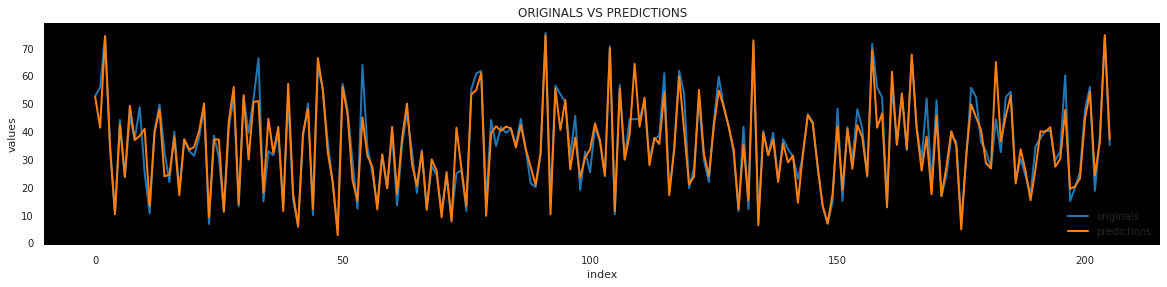

In [109]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
xgr =XGBRegressor(random_state=42)
model(xgr,X_train,y_train,X_test,y_test,"feat",True)

XGBRegressor(base_score=None, booster=None, colsample_bylevel=0.9,
             colsample_bynode=0.9, colsample_bytree=0.9, gamma=0.1, gpu_id=None,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.03, max_delta_step=None, max_depth=9,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
             random_state=42, reg_alpha=0.005, reg_lambda=None,
             scale_pos_weight=None, subsample=0.7, tree_method=None,
             validate_parameters=None, verbosity=None)
***************************************************************************
ROOT MEAN SQUARED ERROR : 4.463634119704717
***************************************************************************
Performance on training data : 99.67867627864199
Performance on testing data : 92.26782455453575
***************************************************************************
CROSS VALIDATION S

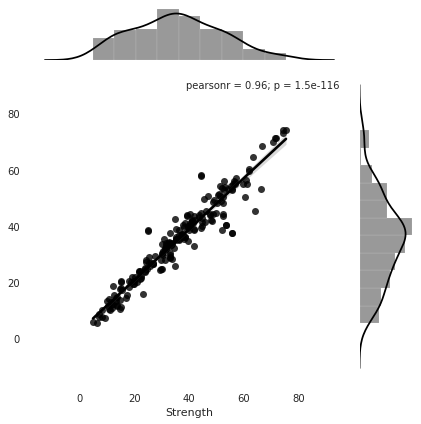

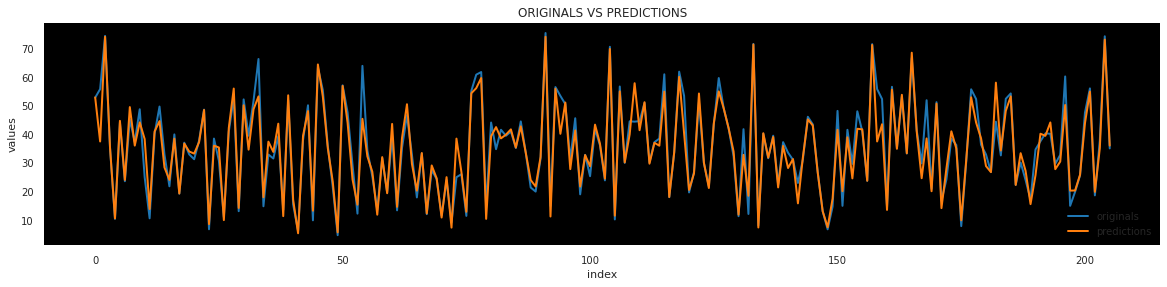

In [110]:
xgr_1=XGBRegressor(random_state=42,learning_rate = 0.03,
                max_depth = 9, n_estimators = 1000,n_jobs=-1,reg_alpha=0.005,gamma=0.1,subsample=0.7,colsample_bytree=0.9, colsample_bylevel=0.9, colsample_bynode=0.9)
model(xgr_1,X_train,y_train,X_test,y_test,"feat",True)

In [111]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
param_grid={'n_estimators' : [1000,2000,3000,2500],
            'max_depth' : [1,2, 3,5,7,9,10,11,15],
            'learning_rate' :[ 0.0001, 0.001, 0.01, 0.1, 0.15, 0.2, 0.8, 1.0],
                                                     }
# Create a base model
xgbr = XGBRegressor(random_state = 42,reg_alpha=0.005,gamma=0.1,subsample=0.7,colsample_bytree=0.9, colsample_bylevel=0.9, colsample_bynode=0.9)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = xgbr, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [112]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 16.5min finished


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=0.9, colsample_bynode=0.9,
                                    colsample_bytree=0.9, gamma=0.1,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=42,
                                    reg_alpha=0.005, reg_lambda=None,
                                    scale_pos_weight=None, subsample=0.7,
                                    tree_method=None, validate_parameters=None,
                             

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 2500}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
             colsample_bynode=0.9, colsample_bytree=0.9, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=2500, n_jobs=0, num_parallel_tree=1, random_state=42,
             reg_alpha=0.005, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)
***************************************************************************
ROOT MEAN SQUARED ERROR : 4.177714291375521
***************************************************************************
Performance on training data : 99.24009394043976
Performance on testing data : 93.2266737599851
***************************************************************

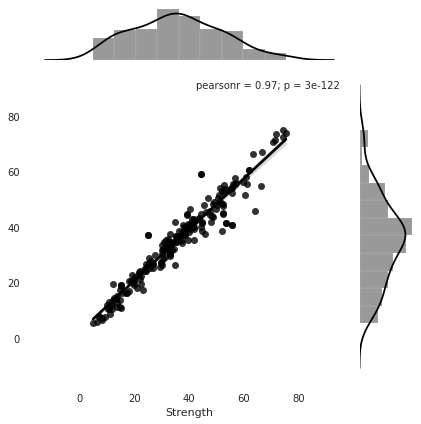

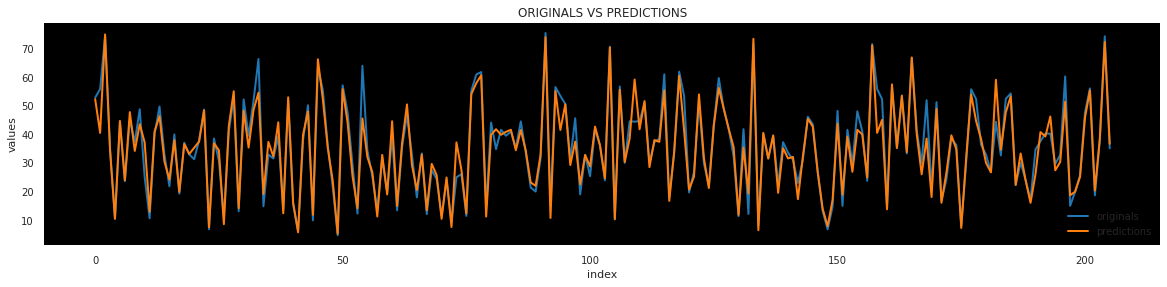

In [113]:
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
model(best_grid,X_train,y_train,X_test,y_test,"feat",True)

In [114]:
from sklearn.ensemble import  RandomForestRegressor
rf = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=80,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
model(rf,X_train,y_train,X_test,y_test,"feat")

RandomForestRegressor(max_depth=80, n_estimators=2000, n_jobs=-1)
***************************************************************************
ROOT MEAN SQUARED ERROR : 5.576768152139842
***************************************************************************
Performance on training data : 98.6794995285407
Performance on testing data : 87.93048825756355
***************************************************************************
CROSS VALIDATION SCORE
************************
cv-mean : 90.82891871587748
cv-std  : 0.7218727208068402


In [123]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# Building ANN As a Regressor
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.normalization import BatchNormalization
from keras import backend

#Defining Root Mean Square Error As our Metric Function 
def rmse(y_true, y_pred):
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

# Initialising the ANN
model_nn = Sequential()

# Adding the input layer and the first hidden layer
model_nn.add(Dense(512, activation = 'relu', input_dim = 8))
model_nn.add(BatchNormalization())
# Adding the second hidden layer
model_nn.add(Dense(units = 256, activation = 'relu'))
model_nn.add(BatchNormalization())
# Adding the third hidden layer
model_nn.add(Dense(units = 256, activation = 'relu'))
model_nn.add(BatchNormalization())
model_nn.add(Dense(units = 128, activation = 'relu'))
model_nn.add(BatchNormalization())
# Adding the output layer
model_nn.add(Dense(units = 1))

# Optimize , Compile And Train The Model 
opt =keras.optimizers.Adam(lr=0.003)
#print(model_nn.summary())
model_nn.compile(optimizer=opt,loss='mean_squared_error',metrics=[rmse])

In [124]:
import tensorflow as tf
checkpoint_filepath ='best.hdf5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_rmse',
    mode='min',
    save_best_only=True)

# Model weights are saved at the end of every epoch, if it's the best seen
# so far.
history=model_nn.fit(sc.fit_transform(X_train),y_train,epochs = 100 ,batch_size=32,validation_data=(sc.transform(X_test), y_test), callbacks=[model_checkpoint_callback])

# The model weights (that are considered the best) are loaded into the model.
model_nn.load_weights(checkpoint_filepath)

Epoch 1/100
26/26 [==============================] - 0s 16ms/step - loss: 1342.3181 - rmse: 35.1679 - val_loss: 1479.7542 - val_rmse: 36.4484
Epoch 2/100
26/26 [==============================] - 0s 8ms/step - loss: 1148.2545 - rmse: 32.9704 - val_loss: 1064.4850 - val_rmse: 30.3105
Epoch 3/100
26/26 [==============================] - 0s 8ms/step - loss: 886.8461 - rmse: 28.8542 - val_loss: 677.2556 - val_rmse: 22.9980
Epoch 4/100
26/26 [==============================] - 0s 8ms/step - loss: 531.5074 - rmse: 21.7126 - val_loss: 499.7427 - val_rmse: 18.8822
Epoch 5/100
26/26 [==============================] - 0s 8ms/step - loss: 222.7334 - rmse: 13.1606 - val_loss: 202.4072 - val_rmse: 11.2470
Epoch 6/100
26/26 [==============================] - 0s 7ms/step - loss: 79.4236 - rmse: 7.1534 - val_loss: 101.5152 - val_rmse: 8.1428
Epoch 7/100
26/26 [==============================] - 0s 8ms/step - loss: 48.6544 - rmse: 5.2028 - val_loss: 90.2434 - val_rmse: 7.8096
Epoch 8/100
26/26 [==========

26/26 [==============================] - 0s 8ms/step - loss: 20.4051 - rmse: 3.4701 - val_loss: 32.9153 - val_rmse: 3.8699
Epoch 62/100
26/26 [==============================] - 0s 9ms/step - loss: 18.7431 - rmse: 3.3795 - val_loss: 28.7274 - val_rmse: 3.6478
Epoch 63/100
26/26 [==============================] - 0s 7ms/step - loss: 22.1305 - rmse: 3.6496 - val_loss: 33.0644 - val_rmse: 3.5725
Epoch 64/100
26/26 [==============================] - 0s 10ms/step - loss: 22.8610 - rmse: 3.7698 - val_loss: 28.0337 - val_rmse: 3.3473
Epoch 65/100
26/26 [==============================] - 0s 8ms/step - loss: 20.7648 - rmse: 3.5375 - val_loss: 27.2531 - val_rmse: 3.4819
Epoch 66/100
26/26 [==============================] - 0s 8ms/step - loss: 18.3264 - rmse: 3.2324 - val_loss: 30.7466 - val_rmse: 3.9539
Epoch 67/100
26/26 [==============================] - 0s 7ms/step - loss: 16.9557 - rmse: 3.1214 - val_loss: 34.1413 - val_rmse: 3.9481
Epoch 68/100
26/26 [==============================] - 0s 10m

Root Mean Squared Error is:  5.264239176874884


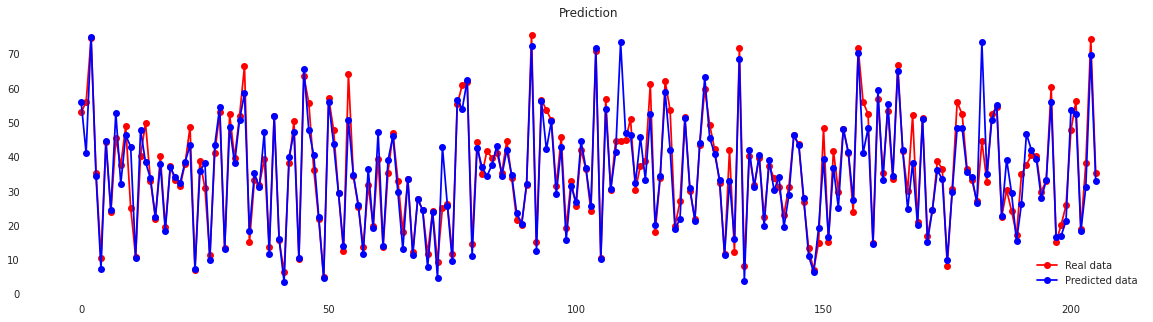

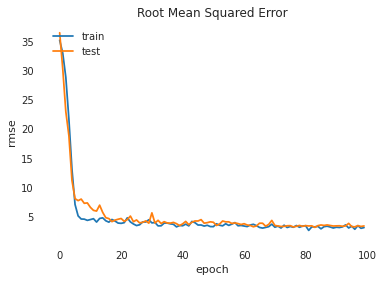

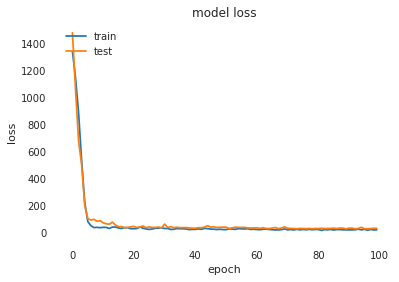

In [125]:
# Predicting and Finding R Squared Score
y_predict = model_nn.predict(sc.transform(X_test))
print('Root Mean Squared Error is: ', np.sqrt(mean_squared_error(y_test, y_predict))) 

plt.figure(figsize=(20,5))
plt.plot(list(y_test) ,color = 'red', label = 'Real data',marker='o')
plt.plot(y_predict, color = 'blue', label = 'Predicted data',marker='o')
plt.title('Prediction')
plt.legend()
plt.show()

# Plotting Loss And Root Mean Square Error For both Training And Test Sets
plt.plot(history.history['rmse'])
plt.plot(history.history['val_rmse'])
plt.title('Root Mean Squared Error')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()